# Foreword

As part of the [Data Scientist training](https://datascientest.com/formation-data-scientist) with the Data Scientest organization, a common thread project is to be carried out, as a team, throughout it.

This common thread project therefore has several objectives :

   * Translate a business problem into a Data Science problem
   * Identify and choose the data necessary for its resolution
   * Model the problem (data, choice of algorithms, etc.)
   * Bring business expertise and a critical look at its results
   * Restore, present and illustrate its results to any type of audience

The chosen project is the KiTS21, which consists of segmenting the kidneys and possible kidney tumors. All the information, as well as the data, is available on the [official website of the competition](https://kits21.kits-challenge.org).

# First Stage

The aim of this notebook is therefore to present the first step requested within the framework of this project :

Exploration of the problem and visualization of the data.

As the data we have are images, it seemed complicated to us to establish a report containing the data visualization requested during this first step. However, a file in json format, containing the metadata of the 300 patients to whom the 300 images belong, is provided. The latter therefore allows us to carry out the expected data visualization as well as to make certain hypotheses concerning kidney cancer.

# Environment

In [1]:
#import all the necessary packages
import numpy as np
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import json
import nibabel as nib
from ipywidgets import interact

In [2]:
pd.set_option('display.max_columns', None)

# Exploratory Data Analysis

In [3]:
#load json with meta data cases
with open('/Users/Gladou/Documents/DataScientest/project/kits21/kits21/data/kits.json','r') as f:
    data = json.loads(f.read())

df = pd.json_normalize(data, max_level=1)
df.head()

,case_id,age_at_nephrectomy,gender,body_mass_index,smoking_history,age_when_quit_smoking,pack_years,chewing_tobacco_use,alcohol_use,hospitalization,ischemia_time,radiographic_size,pathologic_size,malignant,pathology_t_stage,pathology_n_stage,pathology_m_stage,tumor_histologic_subtype,tumor_necrosis,tumor_isup_grade,clavien_surgical_complications,er_visit,readmission,estimated_blood_loss,surgery_type,surgical_procedure,surgical_approach,operative_time,cytoreductive,positive_resection_margins,vital_status,vital_days_after_surgery,comorbidities.myocardial_infarction,comorbidities.congestive_heart_failure,comorbidities.peripheral_vascular_disease,comorbidities.cerebrovascular_disease,comorbidities.dementia,comorbidities.copd,comorbidities.connective_tissue_disease,comorbidities.peptic_ulcer_disease,comorbidities.uncomplicated_diabetes_mellitus,comorbidities.diabetes_mellitus_with_end_organ_damage,comorbidities.chronic_kidney_disease,comorbidities.hemiplegia_from_stroke,comorbidities.leukemia,comorbidities.malignant_lymphoma,comorbidities.localized_solid_tumor,comorbidities.metastatic_solid_tumor,comorbidities.mild_liver_disease,comorbidities.moderate_to_severe_liver_disease,comorbidities.aids,intraoperative_complications.blood_transfusion,intraoperative_complications.injury_to_surrounding_organ,intraoperative_complications.cardiac_event,last_preop_egfr.value,last_preop_egfr.days_before_nephrectomy,first_postop_egfr.value,first_postop_egfr.days_before_nephrectomy,last_postop_egfr.value,last_postop_egfr.days_before_nephrectomy,voxel_spacing.x_spacing,voxel_spacing.y_spacing,voxel_spacing.z_spacing
0,case_00000,49,male,29.47,never_smoked,not_applicable,0,never_or_not_in_last_3mo,two_or_less_daily,2,20,2.4,2.1,True,1a,0,0,clear_cell_rcc,False,3.0,0,False,False,400.0,robotic,partial_nephrectomy,Transperitoneal,324.0,False,False,censored,1420,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,77.0,54.0,76.0,184.0,>=90,1420.0,0.919922,0.919922,0.5
1,case_00001,50,male,33.71,previous_smoker,33,7,never_or_not_in_last_3mo,two_or_less_daily,6,13,2.2,2.4,True,1a,X,X,papillary,False,2.0,1,True,False,1100.0,open,partial_nephrectomy,Retroperitoneal,293.0,False,False,censored,1401,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,67.0,1.0,58.0,117.0,56.0,1401.0,0.798828,0.798828,0.5
2,case_00002,74,male,28.13,current_smoker,not_applicable,50,never_or_not_in_last_3mo,never_or_not_in_last_3mo,1,18,4.5,5.4,True,3,0,0,papillary,False,2.0,0,False,False,200.0,robotic,partial_nephrectomy,Transperitoneal,229.0,False,False,censored,1185,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,None,NaN,85.0,76.0,83.0,1185.0,0.939453,0.939453,1.0
3,case_00003,44,female,38.69,previous_smoker,None,None,never_or_not_in_last_3mo,two_or_less_daily,0,15,3.0,2.9,True,1a,0,0,chromophobe,False,NaN,1,False,False,100.0,robotic,partial_nephrectomy,Transperitoneal,180.0,False,False,censored,114,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,86.0,61.0,80.0,114.0,80.0,114.0,0.855469,0.855469,1.0
4,case_00004,73,male,28.59,previous_smoker,55,None,never_or_not_in_last_3mo,never_or_not_in_last_3mo,2,17,3.0,3.4,True,1a,X,X,clear_cell_rcc,False,2.0,0,False,False,130.0,robotic,partial_nephrectomy,Transperitoneal,123.0,False,False,censored,500,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,None,NaN,45.0,500.0,45.0,500.0,0.976562,0.976562,4.0


In [4]:
df.shape

(300, 63)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 63 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   case_id                                                   300 non-null    object 
 1   age_at_nephrectomy                                        300 non-null    int64  
 2   gender                                                    300 non-null    object 
 3   body_mass_index                                           300 non-null    float64
 4   smoking_history                                           300 non-null    object 
 5   age_when_quit_smoking                                     265 non-null    object 
 6   pack_years                                                194 non-null    object 
 7   chewing_tobacco_use                                       300 non-null    object 
 8   alcohol_use         

## Gender Proportion

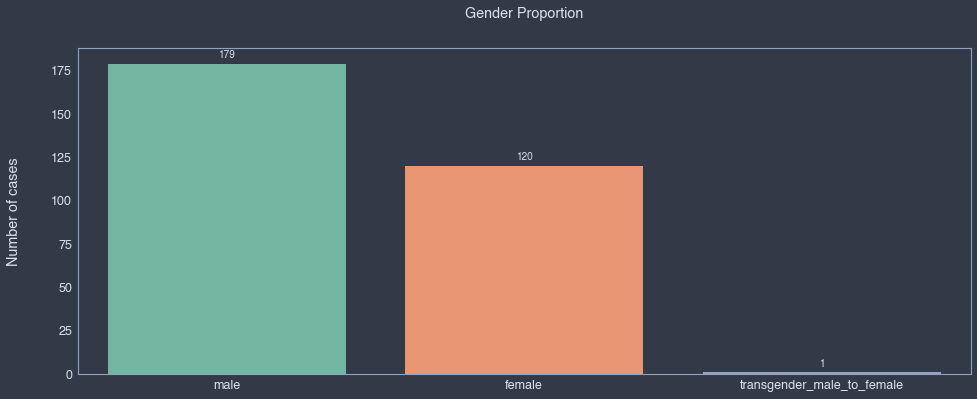

In [6]:
plt.figure(figsize=(16,6))

ax = sns.countplot(x=df['gender'], palette='Set2')

plt.xlabel('')
plt.ylabel('Number of cases', labelpad=30)
plt.title('Gender Proportion', pad=30)

for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points')

plt.show(ax)

In [7]:
#for more simplicity, we decide to associate the transgender person with the category of their gender at birth
df.loc[df['gender'] == 'transgender_male_to_female', 'gender'] = 'male'

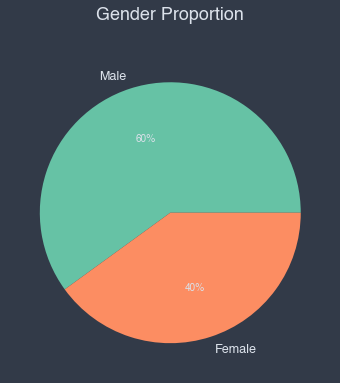

In [8]:
plt.figure(figsize=(8,6))

labels=['Male', 'Female']
colors = sns.color_palette('Set2')

plt.pie(df['gender'].value_counts(), labels=labels, autopct='%1.f%%', colors=colors)
plt.title('Gender Proportion', fontsize=18, pad=30)

plt.show()

## Body Mass Index

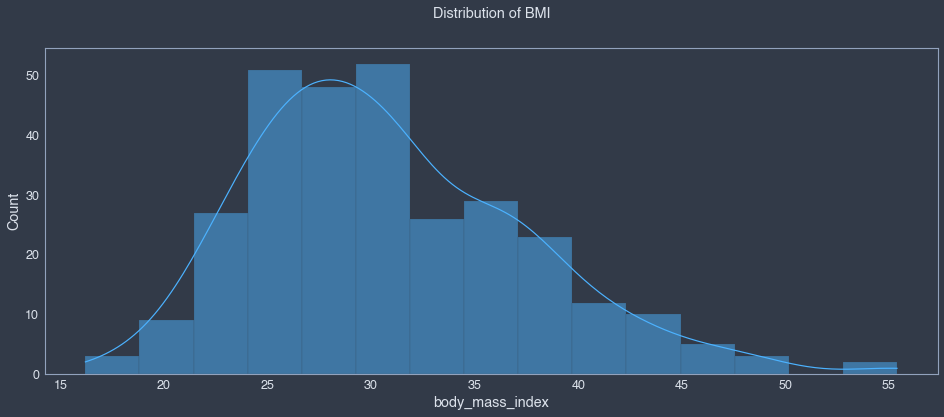

In [9]:
plt.figure(figsize=(16,6))

sns.histplot(x=df['body_mass_index'], kde=True, color='#4cb2ff')

plt.title('Distribution of BMI', pad=30)
plt.show()

## Alcohol Use

In [10]:
df.loc[df['alcohol_use'] == '', 'alcohol_use'] = 'not_communicated'

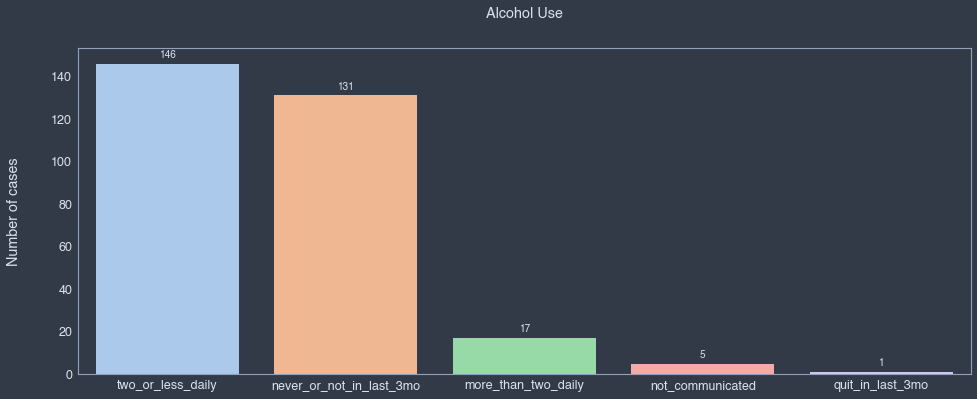

In [11]:
plt.figure(figsize=(16,6))

ax = sns.countplot(x=df['alcohol_use'], palette='pastel')

plt.xlabel('')
plt.ylabel('Number of cases', labelpad=30)
plt.title('Alcohol Use', pad=30)

for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points')

plt.show(ax)

## Smocking History

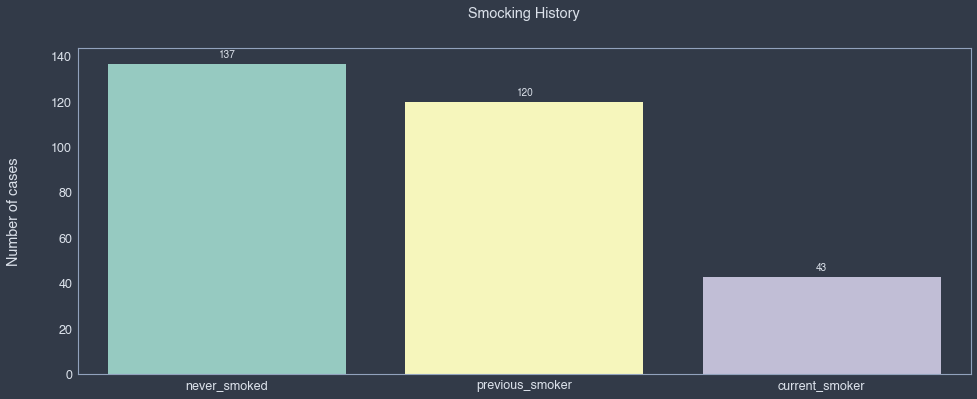

In [12]:
plt.figure(figsize=(16,6))

ax = sns.countplot(x=df['smoking_history'], palette='Set3')

plt.xlabel('')
plt.ylabel('Number of cases', labelpad=30)
plt.title('Smocking History', pad=30)


for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points')

plt.show(ax)

## Malignancy

📌 Summary : 

Kidney cancer, which ranks 6th among solid malignant tumors, is one of the most common malignant tumors in adults worldwide. Fortunately, most kidney tumors are discovered early, by chance in 70 to 80% of cases, when they are still localized and operable.
<br><br>
Almost 70-80% of kidney tumors are malignant.
<br><br>
The median age at diagnosis is 69 and the sex ratio is two men for one woman. A third of patients are diagnosed at the metastatic stage, and among patients with a localized form, about 30% will develop metastases.
<br><br>
The risk factors for kidney cancer are: tobacco, obesity, male sex, high blood pressure, renal failure, kidney transplantation, environmental exposure (trichlorethylene) as well as certain genetic predispositions.
<br><br>
There are two types of lesions : cystic (hollow) lesions and tumors (benign or malignant solid lesions).

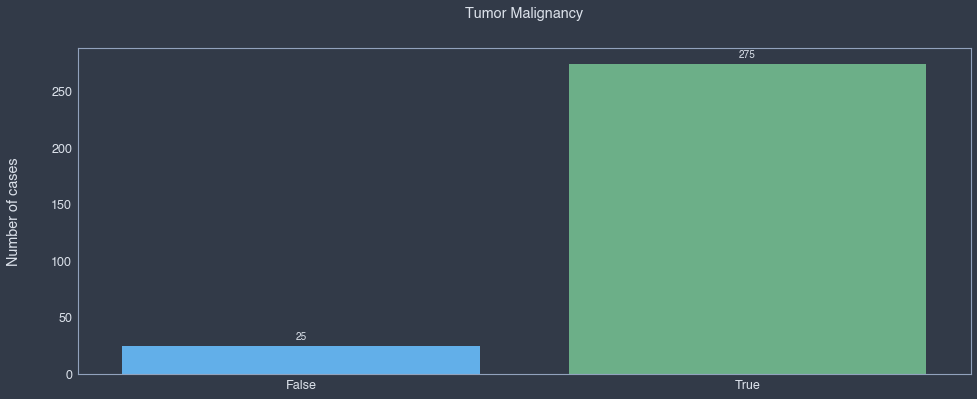

In [13]:
plt.figure(figsize=(16,6))

ax = sns.countplot(x=df['malignant'], palette=('#4cb2ff', '#61ba86'))

plt.xlabel('')
plt.ylabel('Number of cases', labelpad=30)
plt.title('Tumor Malignancy', pad=30)

for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points')

plt.show(ax)

### According to Gender

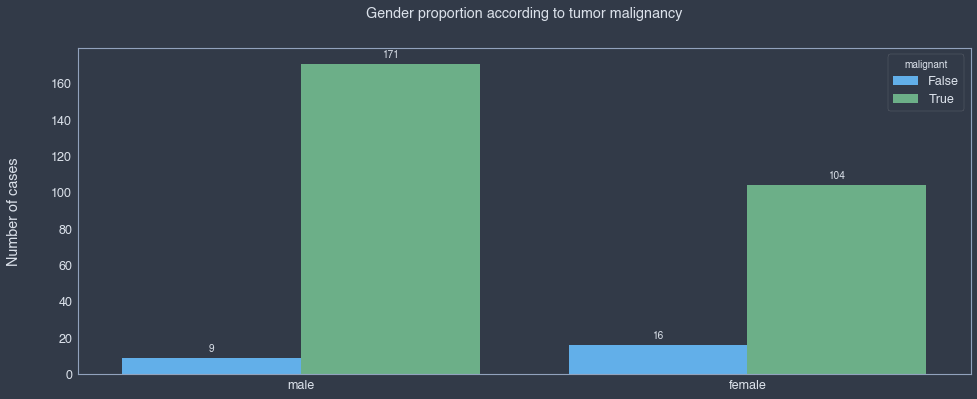

In [14]:
plt.figure(figsize=(16,6))

ax = sns.countplot(x=df['gender'], hue=df['malignant'], palette=('#4cb2ff', '#61ba86'))

plt.xlabel('')
plt.ylabel('Number of cases', labelpad=30)
plt.title('Gender proportion according to tumor malignancy', pad=30)

for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points')

plt.show(ax)

### According to BMI

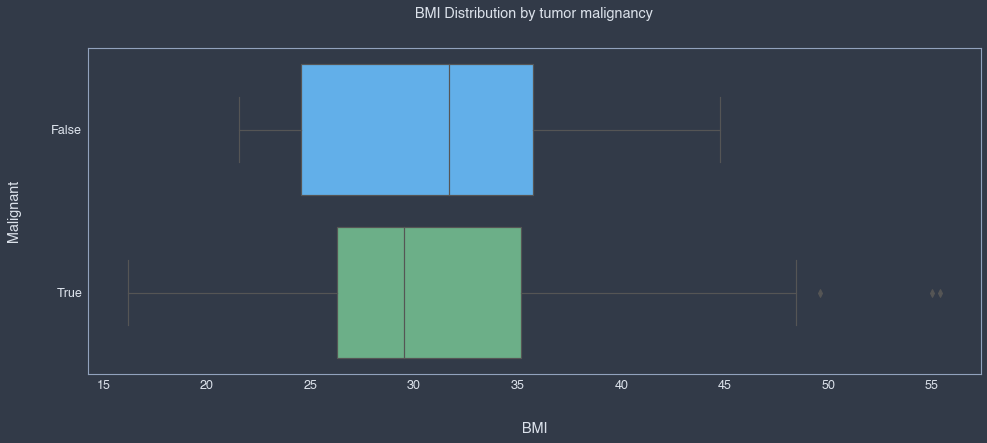

In [15]:
plt.figure(figsize=(16,6))

sns.boxplot(x=df['body_mass_index'], y=df['malignant'], orient='h', palette=('#4cb2ff', '#61ba86'))

plt.xlabel('BMI', labelpad=30)
plt.ylabel('Malignant', labelpad=30)
plt.title('BMI Distribution by tumor malignancy', pad=30)
plt.show()

### According to Alcohol Use

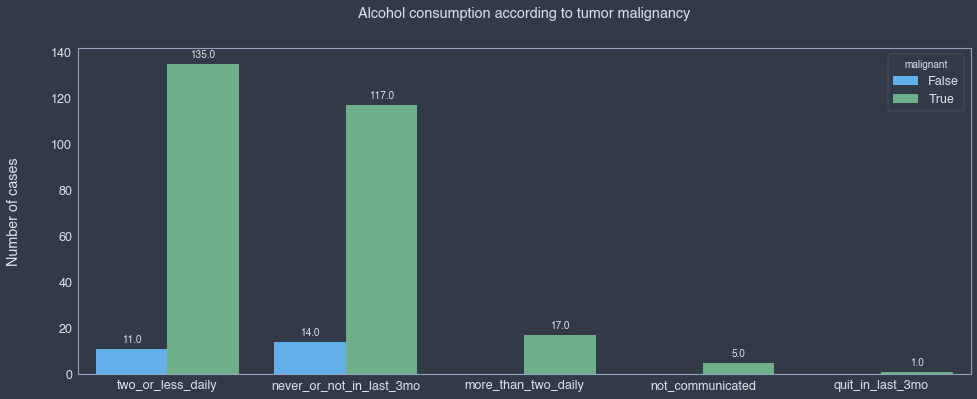

In [16]:
plt.figure(figsize=(16,6))
ax = sns.countplot(x=df['alcohol_use'], hue=df['malignant'],  palette=('#4cb2ff', '#61ba86'))
plt.xlabel('')
plt.ylabel('Number of cases', labelpad=30)
plt.title('Alcohol consumption according to tumor malignancy', pad=30)

for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points')

plt.show(ax)

### According to Histologic Type

In [17]:
df.loc[df['tumor_histologic_subtype'] == '', 'tumor_histologic_subtype'] = 'not_communicated'

In [18]:
df.groupby('tumor_histologic_subtype')['malignant'].unique()

tumor_histologic_subtype
angiomyolipoma               [False]
chromophobe                   [True]
clear_cell_papillary_rcc      [True]
clear_cell_rcc                [True]
collecting_duct_undefined     [True]
mest                         [False]
multilocular_cystic_rcc       [True]
not_communicated             [False]
oncocytoma                   [False]
other                         [True]
papillary                     [True]
rcc_unclassified              [True]
spindle_cell_neoplasm        [False]
urothelial                    [True]
wilms                         [True]
Name: malignant, dtype: object

In [19]:
df['tumor_histologic_subtype'].value_counts()

clear_cell_rcc               204
papillary                     28
chromophobe                   27
oncocytoma                    16
clear_cell_papillary_rcc       7
angiomyolipoma                 5
urothelial                     3
rcc_unclassified               2
mest                           2
spindle_cell_neoplasm          1
wilms                          1
multilocular_cystic_rcc        1
not_communicated               1
other                          1
collecting_duct_undefined      1
Name: tumor_histologic_subtype, dtype: int64

## Voxel Spacing

📌 Voxel Z spacing corresponding to the slice thickness. Important information if final 3D network.

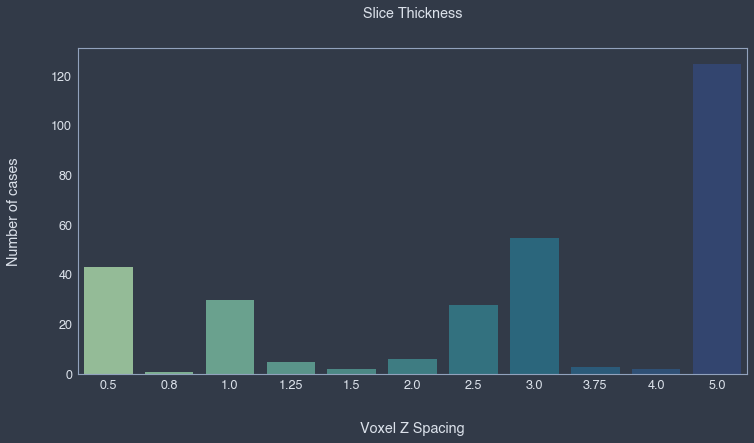

In [20]:
plt.figure(figsize=(12,6))

sns.countplot(x=round(df['voxel_spacing.z_spacing'],2), palette='crest')

plt.xlabel('Voxel Z Spacing', labelpad=30)
plt.ylabel('Number of cases', labelpad=30)
plt.title('Slice Thickness', pad=30)

plt.show()

# Hypothesis

⁉️ The KiTS21 cohort includes patients who underwent partial or radical nephrectomy for suspected renal malignancy between 2010 and 2020. A retrospective review of these cases was conducted to identify all patients who had undergone a preoperative contrast-enhanced CT scan that included all of the kidneys.

Therefore, making assumptions on this data set is not prudent because of the bias on the input population as well as on the constitution of the sample.

# Conclusion

⚠️ This notebook does not enter voluntarily into the exploratory data analysis. This was to meet the data visualization objective requested in step 1 of the red thread project. As it was difficult to achieve multiple relevant visualizations on the images used for segmentation, json exploration seemed more appropriate.

The image preprocessing steps will be processed in a future notebook.

In [21]:
# Define the image path and load the data
image_path = "/Users/Gladou/Documents/DataScientest/project/kits21/kits21/data/case_00000/imaging.nii.gz"
image_obj = nib.load(image_path)

# Extract data as numpy ndarray
image_data = image_obj.get_fdata()
type(image_data)

numpy.ndarray

In [22]:
image_data.shape

(611, 512, 512)

In [73]:
# Define a function to visualize the raw data
def explore_3dimage(layer):
    plt.figure(figsize=(16, 9))
    plt.imshow(image_data[layer, : , :], cmap='gray');
    plt.title('', fontsize=20)
    plt.axis('off')
    return layer

# Run the ipywidgets interact() function to explore the data
interact(explore_3dimage, layer=(0, image_data.shape[2] - 1));

interactive(children=(IntSlider(value=255, description='layer', max=511), Output()), _dom_classes=('widget-int…

⚠️ The interact package of the ipywidgets module allows us to display the entire exam (we can scroll it slice by slice). Only, this visualization doesn't work on GitHub. So here is a look at a single cut from the review : 

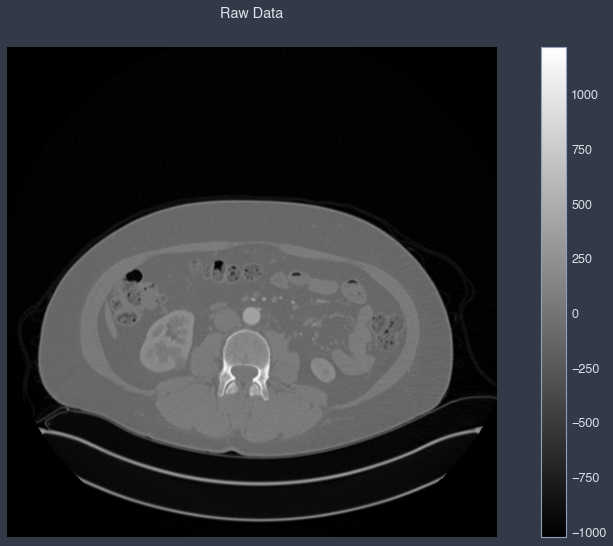

In [42]:
plt.figure(figsize=(16,9))

plt.imshow(image_data[297, :, :], cmap='gray')
plt.axis('off')
plt.title('Raw Data', pad=30)
plt.colorbar()

plt.show()

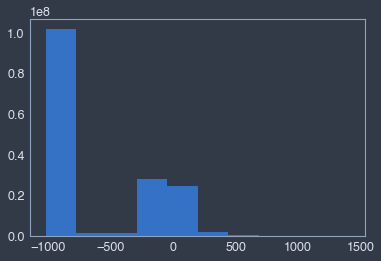

In [39]:
# Pixel value distribution
plt.hist(image_data.flatten());

In [74]:
# Same for the segmentation
seg_path = "/Users/Gladou/Documents/DataScientest/project/kits21/kits21/data/case_00000/aggregated_MAJ_seg.nii.gz"
seg_obj = nib.load(seg_path)

# Extract data as numpy ndarray
seg_data = seg_obj.get_fdata()

# Define a function to visualize the segmentation
def explore_3dimage(layer):
    plt.figure(figsize=(16, 9))
    plt.imshow(seg_data[layer, : , :], cmap='gray');
    plt.title('', fontsize=20)
    plt.axis('off')
    return layer

# Run the ipywidgets interact() function to explore the data
interact(explore_3dimage, layer=(0, seg_data.shape[2] - 1));

interactive(children=(IntSlider(value=255, description='layer', max=511), Output()), _dom_classes=('widget-int…

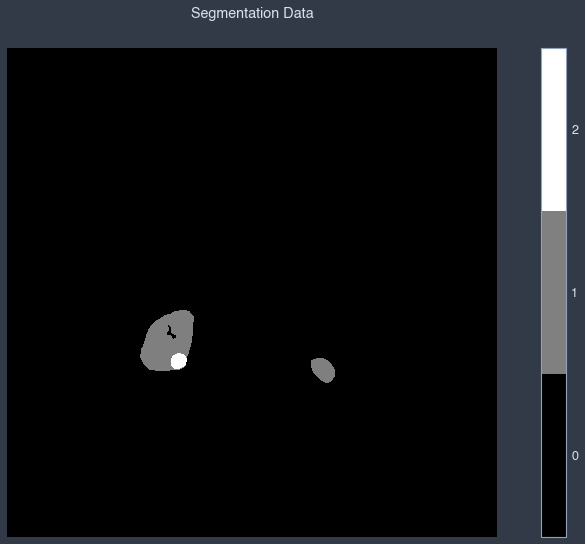

In [72]:
def discrete_imshow(data):
    plt.figure(figsize=(16,9))
    #get discrete colormap
    cmap = plt.get_cmap('gray', np.max(data)-np.min(data)+1)
    # set limits .5 outside true range
    im = plt.imshow(data, cmap=cmap, vmin = np.min(data)-.5, vmax = np.max(data)+.5)
    #tell the colorbar to tick at integers
    cax = plt.colorbar(im, ticks=np.arange(np.min(data), np.max(data)+1))
    plt.axis('off')
    plt.title('Segmentation Data', pad=30)
    
discrete_imshow(seg_data[297, :, :])